<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Description" data-toc-modified-id="Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Description</a></span></li><li><span><a href="#Load" data-toc-modified-id="Load-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load</a></span></li></ul></div>

# Description

Aim: just vizualize the results of the code. 

# Load

In [156]:
%load_ext autoreload
%autoreload 2
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os

from result_analysis import plot_ri

from result_analysis import print_final_flows

from result_analysis import plot_cost_all_path

import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [157]:
path='Data/10Nodes/'

In [158]:
with open(os.path.join(path, 'output.pkl'), 'rb') as f:
        G_FW, OD, ri_FW, n_outer, n_inner, balance = pickle.load(f)

In [159]:
OD

{('0', '0_p'): 20, ('5', '5_p'): 30}

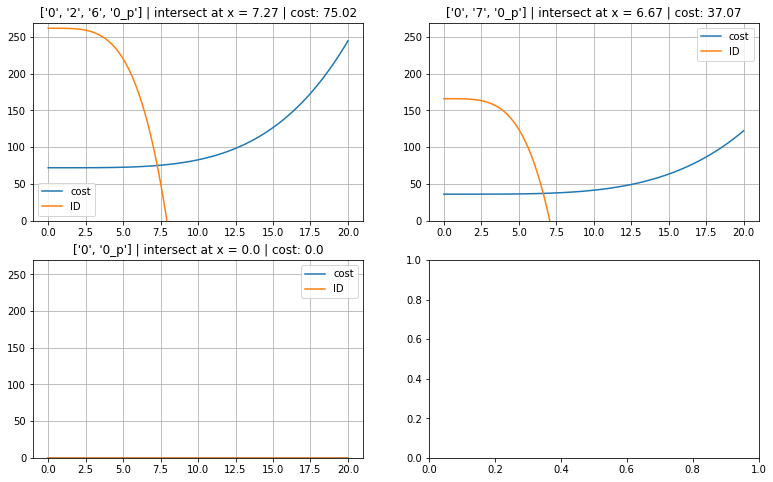

In [160]:

plot_cost_all_path(G_FW[0], OD, '0', '0_p')

In [161]:
final_=pd.DataFrame(columns=['o','d','f_m','f_r'])

for e in G_FW[-1].edges():
    data=np.array([e[0],e[1], np.around(G_FW[-1][e[0]][e[1]]['f_m'],2), np.around(G_FW[-1][e[0]][e[1]]['f_r'],2)])
    l=pd.DataFrame(columns=final_.columns,data=data.reshape(1,4))
    final_=final_.append(l,ignore_index=True)

In [162]:
final_

,o,d,f_m,f_r
0,0,1,0.0,10.93
1,0,2,7.28,0.0
2,0,3,10.71,0.0
3,0,7,6.63,0.0
4,0,R,0.0,13.92
5,0,0_p,6.09,0.0
6,1,0,10.71,0.22
7,1,4,0.0,10.93
8,2,0,0.0,7.28
9,2,6,7.28,0.0


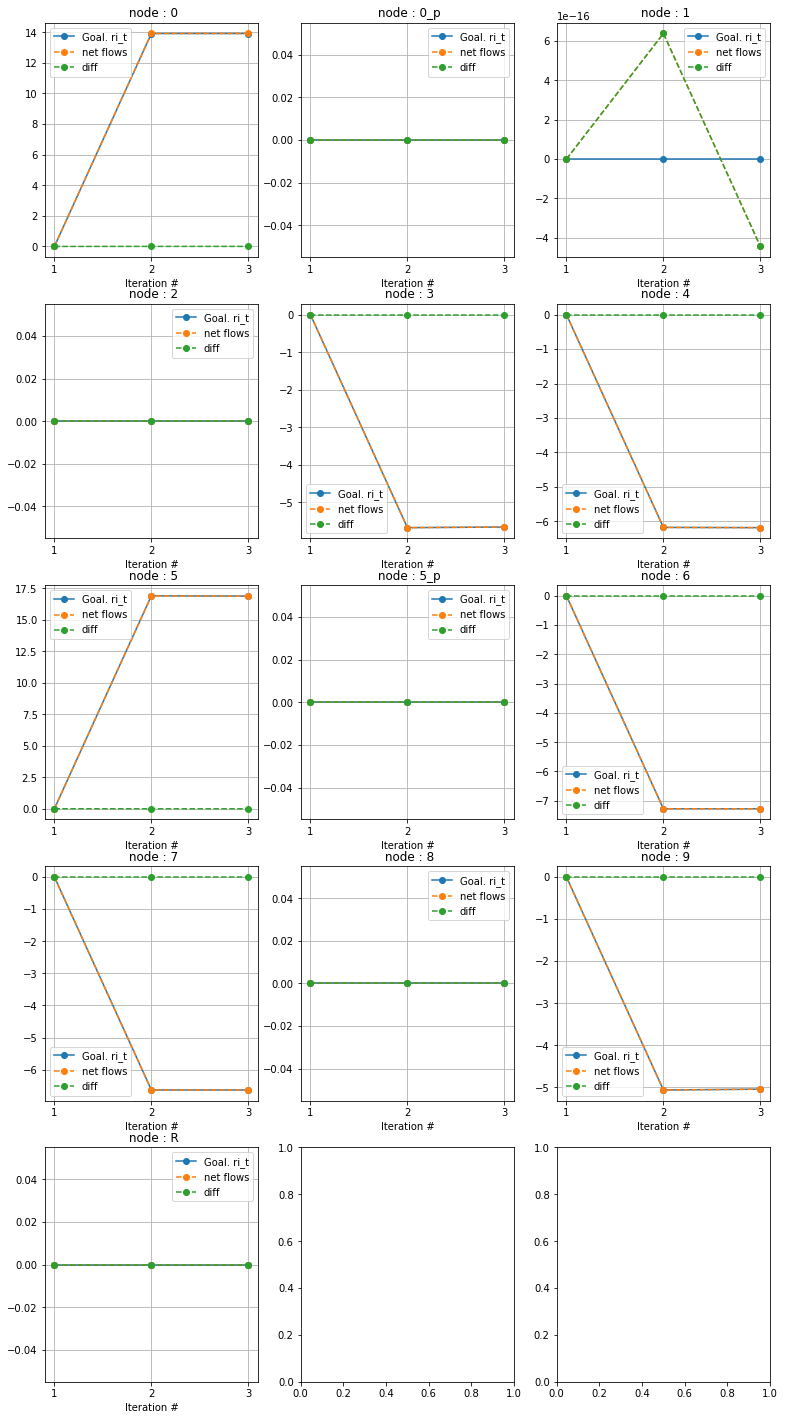

In [166]:
plot_ri(ri_FW, G_FW, compare = True)

<Figure size 432x288 with 0 Axes>

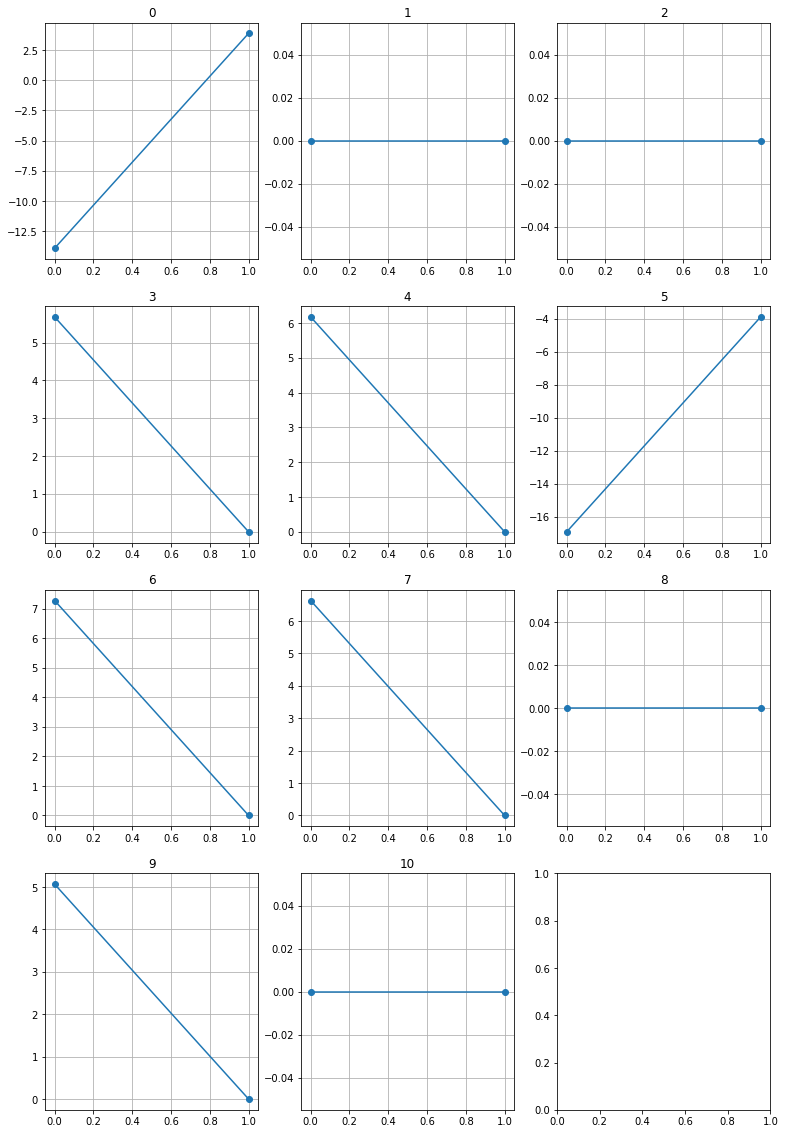

In [59]:
plt.figure()
nplots=balance.shape[1]
ncols=3
nrows=int(np.ceil(nplots/ncols))
_, axes = plt.subplots(nrows,ncols, figsize=(13, 5*nrows))
i=0
j=0
for n in range(balance.shape[1]):
    if j==ncols:
        j=0
        i+=1
    if i==nrows:
        i=0
    axes[i,j].plot(balance[:,n],'o-')
    axes[i,j].grid(True)
    axes[i,j].set_title(n)
#     axes[n].set_ylim([np.min(balance[-5:,n])*.9, np.max(balance[-5:,n])*1.1])
    j+=1

In [170]:
balance.shape

(3, 11)

0.006253986596572074


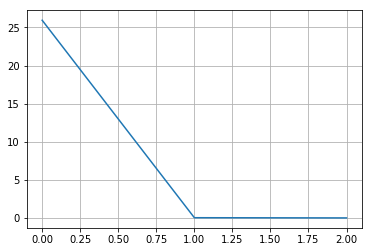

In [171]:
balance_norm=np.linalg.norm(balance,axis=1)

plt.plot(balance_norm)
plt.grid(True)
# plt.yscale('log')

print(balance_norm[-1])

Some way of measuring the amplitudes of oscillations? 

In [156]:
nx.write_graphml(G_FW[-1],os.path.join(path,'graph.graphml'))